In [1]:
import requests
import json
import string
from nltk.corpus import stopwords
from collections import deque
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from datetime import date
import os

In [2]:
def dameTitulares(URL, auxTag, auxClase):
    print(f"Filtrando resultados do medio: {URL}")
    _parser = BeautifulSoup(requests.get(URL).content, "html.parser")
    _titulares = _parser.find_all(auxTag, class_=auxClase)
    pilaTitulares = deque()
    enlace = ""

    for _auxTit in _titulares:

        # OJO: añado la URL antes del enlace ya que viene la ruta relativa sólo
        if _auxTit.find("a").get("href")[0] == "/":
            enlace = URL+_auxTit.find("a").get("href")
        else:
            enlace = _auxTit.find("a").get("href")
            
        pilaTitulares.append([_auxTit.text.strip(),
                               enlace])
    return (pilaTitulares)

# Lectura do arquivo json cargando os datos na variable URLS
with open("medios.json", "r") as f:
    URLS = json.load(f)

print(URLS)


{'La Voz de Galicia': {'url': 'https://www.lavozdegalicia.es', 'tag': 'h4', 'clase': 'a-min-headline'}, 'El País': {'url': 'https://www.elpais.com', 'tag': 'h2', 'clase': 'c_t'}, 'El Mundo': {'url': 'https://www.elmundo.es', 'tag': 'h2', 'clase': 'ue-c-cover-content-link'}, 'ABC': {'url': 'https://www.abc.es/', 'tag': 'h2', 'clase': 'voc-title voc-title--s18-fxs20'}, 'El Economista': {'url': 'https://www.eleconomista.es/', 'tag': 'div', 'clase': 'articleHeadline'}, 'Vozpopuli': {'url': 'https://www.vozpopuli.com/', 'tag': 'div', 'clase': 'post-content'}}


In [3]:
allTitulares = deque()
enderezos = json.loads(json.dumps(URLS))

for auxURL in enderezos:
    allTitulares.append(
        dameTitulares(
        enderezos[auxURL]['url'], 
        enderezos[auxURL]['tag'], 
        enderezos[auxURL]['clase']))
    
for auxTitular in allTitulares:
    print(auxTitular)

Filtrando resultados do medio: https://www.lavozdegalicia.es
Filtrando resultados do medio: https://www.elpais.com
Filtrando resultados do medio: https://www.elmundo.es
Filtrando resultados do medio: https://www.abc.es/
Filtrando resultados do medio: https://www.eleconomista.es/
Filtrando resultados do medio: https://www.vozpopuli.com/
deque([['La ley de amnistía volverá a la Comisión de Justicia por el rechazo de Junts en el Congreso', 'https://www.lavozdegalicia.es/retransmision/espana/2024/01/30/congreso-vota-ley-amnistia-negativa-junts-apoyar-norma/01071706618179575855971.htm'], ['Abren juicio oral por asesinato contra cinco acusados de matar a Samuel Luiz en A Coruña', 'https://www.lavozdegalicia.es/noticia/coruna/coruna/2024/01/30/abren-juicio-oral-contra-cinco-acusados-matar-samuel-luiz-coruna/00031706612046398338480.htm'], ['«Na Seguridade Social dixéronme que levaba ano e medio morto»', 'https://www.lavozdegalicia.es/noticia/galicia/2024/01/30/span-langglna-seguridade-social-d

## TOP 10 palabras más repetidas

> Primeramente saco los titulares de los deques y los junto en un texto separados por líneas

In [4]:
texto_titulares = ""

for auxTitular in allTitulares:
    if len(auxTitular) != 0:
        for titular in auxTitular:
            texto_titulares += f"{titular[0]}\n" # Cogiendo el primer elemento ya que el segundo es el enlace

print(texto_titulares)

La ley de amnistía volverá a la Comisión de Justicia por el rechazo de Junts en el Congreso
Abren juicio oral por asesinato contra cinco acusados de matar a Samuel Luiz en A Coruña
«Na Seguridade Social dixéronme que levaba ano e medio morto»
La inflación repunta tres décimas, hasta el 3,4 %, por la subida de la factura de la luz
El FMI echa por tierra las optimistas previsiones de crecimiento para 2024 del Gobierno
Los años negros de la comisaría de Ourense: robo de pistolas, anónimos y una muerte ahora archivada
Casi 1.200 gallegos perdieron la pensión no contributiva en el 2023 por superar el tope de ingresos
Soldados israelíes disfrazados de médicos matan a tres milicianos de Hamás en un hospital de Cisjordania
Las protestas de los agricultores europeos llegarán a España, pero serán «por regiones»
Once años de cárcel para una educadora social por abusar de una menor de 13 años en un centro de Redondela
Elon Musk anuncia que ya se implantó el primer chip cerebral de Neuralink en un 

### Generación de lista de signos de puntuación

In [5]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

### Listado de palabras a eliminar

In [6]:
stop_words = stopwords.words('spanish')

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

### Reemplazo de signos de puntuación y palabras a eliminar por ""

In [7]:
for sw in stop_words:
    clean_texto = texto_titulares.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

clean_texto

'ley amnistía volverá comisión justicia rechazo junts congreso abren juicio oral asesinato cinco acusados matar samuel luiz coruña na seguridade social dixéronme levaba ano medio morto inflación repunta tres décimas 34 subida factura luz fmi echa tierra optimistas previsiones crecimiento 2024 gobierno años negros comisaría ourense robo pistolas anónimos muerte ahora archivada casi 1200 gallegos perdieron pensión contributiva 2023 superar tope ingresos soldados israelíes disfrazados médicos matan tres milicianos hamás hospital cisjordania protestas agricultores europeos llegarán españa án regiones once años cárcel educadora social abusar menor 13 años centro redondela elon musk anuncia implantó primer chip cerebral neuralink humano conductor 24 años pillado lugo circulando 206 kilómetros hora tramo limitado 100 ayuda suiza maltratada trabajo ribeira vi titular foto voz quedé bloqueada hundida miia italiano mató expareja torremolinos reconoce emparedó novia asesinó felipe oróns estiven u

## Creación de la lista de palabras

In [8]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas y muy largas

for palabra in lista_texto:
    if (len(palabra)>=4 and len(palabra)<18):
        palabras.append(palabra)

palabras

['amnistía',
 'volverá',
 'comisión',
 'justicia',
 'rechazo',
 'junts',
 'congreso',
 'abren',
 'juicio',
 'oral',
 'asesinato',
 'cinco',
 'acusados',
 'matar',
 'samuel',
 'luiz',
 'coruña',
 'seguridade',
 'social',
 'dixéronme',
 'levaba',
 'medio',
 'morto',
 'inflación',
 'repunta',
 'tres',
 'décimas',
 'subida',
 'factura',
 'echa',
 'tierra',
 'optimistas',
 'previsiones',
 'crecimiento',
 '2024',
 'gobierno',
 'años',
 'negros',
 'comisaría',
 'ourense',
 'robo',
 'pistolas',
 'anónimos',
 'muerte',
 'ahora',
 'archivada',
 'casi',
 '1200',
 'gallegos',
 'perdieron',
 'pensión',
 'contributiva',
 '2023',
 'superar',
 'tope',
 'ingresos',
 'soldados',
 'israelíes',
 'disfrazados',
 'médicos',
 'matan',
 'tres',
 'milicianos',
 'hamás',
 'hospital',
 'cisjordania',
 'protestas',
 'agricultores',
 'europeos',
 'llegarán',
 'españa',
 'regiones',
 'once',
 'años',
 'cárcel',
 'educadora',
 'social',
 'abusar',
 'menor',
 'años',
 'centro',
 'redondela',
 'elon',
 'musk',
 'anunc

### Contador de palabras

In [9]:
word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        # Va sumando el número de veces que se repite la palabra
        word_count[palabra][0]+=1
    else:
        # Si aún no se repite, se añade la palabra nueva al diccionario.
        word_count[palabra]=[1]

word_count

{'amnistía': [3],
 'volverá': [2],
 'comisión': [1],
 'justicia': [2],
 'rechazo': [1],
 'junts': [2],
 'congreso': [3],
 'abren': [1],
 'juicio': [1],
 'oral': [1],
 'asesinato': [1],
 'cinco': [2],
 'acusados': [1],
 'matar': [1],
 'samuel': [1],
 'luiz': [1],
 'coruña': [8],
 'seguridade': [1],
 'social': [3],
 'dixéronme': [1],
 'levaba': [1],
 'medio': [2],
 'morto': [1],
 'inflación': [2],
 'repunta': [2],
 'tres': [11],
 'décimas': [3],
 'subida': [1],
 'factura': [1],
 'echa': [1],
 'tierra': [1],
 'optimistas': [1],
 'previsiones': [2],
 'crecimiento': [2],
 '2024': [6],
 'gobierno': [8],
 'años': [13],
 'negros': [1],
 'comisaría': [1],
 'ourense': [1],
 'robo': [1],
 'pistolas': [1],
 'anónimos': [1],
 'muerte': [1],
 'ahora': [1],
 'archivada': [1],
 'casi': [1],
 '1200': [2],
 'gallegos': [1],
 'perdieron': [1],
 'pensión': [1],
 'contributiva': [1],
 '2023': [6],
 'superar': [2],
 'tope': [1],
 'ingresos': [1],
 'soldados': [1],
 'israelíes': [1],
 'disfrazados': [1],
 'm

### Generación de DataFrame apartir del diccionario

In [10]:
df_titulares = pd.DataFrame.from_dict(word_count, orient="index", columns=["ocurrencias"])
df_titulares

,ocurrencias
amnistía,3
volverá,2
comisión,1
justicia,2
rechazo,1
...,...
‘griselda’,1
estreno,1
beatles,1
azotea,1


## Gráfico de barras con las 10 palabras más repetidas

> Primero ordenaré el dataframe por mayor número de ocurrencias

In [11]:
df_titulares.sort_values("ocurrencias", ascending=False, inplace=True)

> Creo una función que realice el gráfico de barras con el dataframe de titulares y el top 10 como valores por defecto

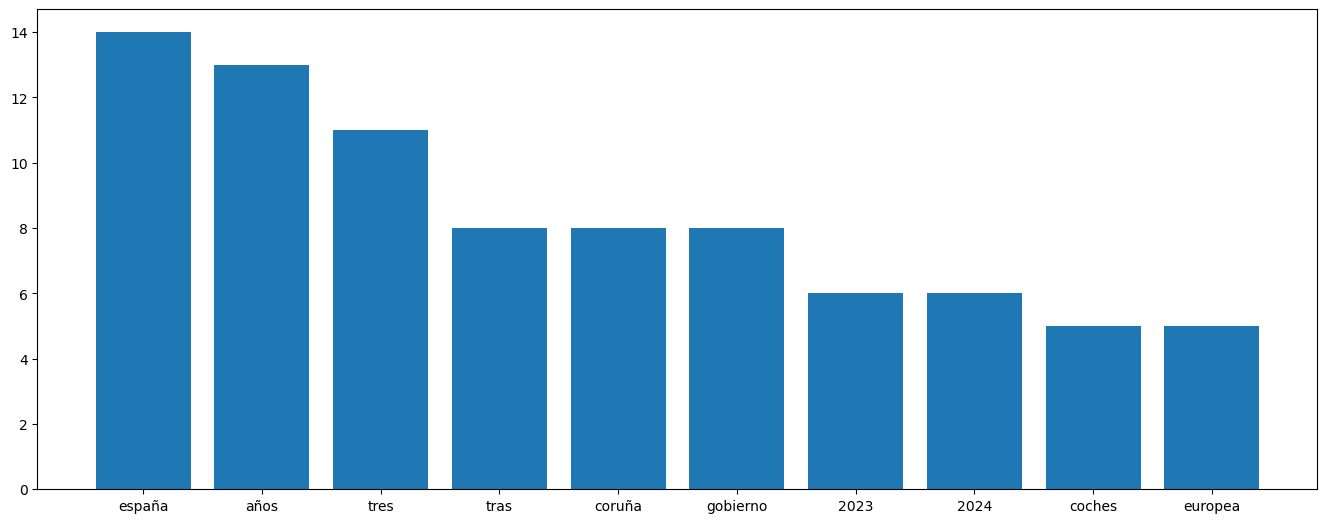

In [12]:
def plot_bar(data=df_titulares, top=10):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df_titulares.iloc[:top,:].index, height = df_titulares.iloc[:top,0].values)
    plt.show()

plot_bar()

## Creación de archivo HTML

> Recogemos todos los titulares en una lista

In [13]:
lista_titulares = []

for auxTitular in allTitulares:
    if len(auxTitular) != 0:
        for titular in auxTitular:
            lista_titulares.append(titular) # Cogiendo el primer elemento ya que el segundo es el enlace

lista_titulares

[['La ley de amnistía volverá a la Comisión de Justicia por el rechazo de Junts en el Congreso',
  'https://www.lavozdegalicia.es/retransmision/espana/2024/01/30/congreso-vota-ley-amnistia-negativa-junts-apoyar-norma/01071706618179575855971.htm'],
 ['Abren juicio oral por asesinato contra cinco acusados de matar a Samuel Luiz en A Coruña',
  'https://www.lavozdegalicia.es/noticia/coruna/coruna/2024/01/30/abren-juicio-oral-contra-cinco-acusados-matar-samuel-luiz-coruna/00031706612046398338480.htm'],
 ['«Na Seguridade Social dixéronme que levaba ano e medio morto»',
  'https://www.lavozdegalicia.es/noticia/galicia/2024/01/30/span-langglna-seguridade-social-dixeronme-levaba-ano-medio-mortospan/0003_202401G30P11991.htm'],
 ['La inflación repunta tres décimas, hasta el 3,4 %, por la subida de la factura de la luz',
  'https://www.lavozdegalicia.es/noticia/economia/2024/01/30/inflacion-sube-tres-decimas-enero-34-precio-luz/00031706602742990271454.htm'],
 ['El FMI echa por tierra las optimist

### Contador de palabras

In [14]:
lista_titulos = []
palabras = []
contador_palabras={}

# Recogida del título del titular
for titular in lista_titulares:
    lista_titulos.append(titular[0])

# Recogida de las palabras del título
for titulo in lista_titulos:
    palabras_titulo = clean_texto.split(" ")
    for palabra in palabras_titulo:
        if (len(palabra)>=4 and len(palabra)<18):
            palabras.append(palabra)
 

# Creación del diccionario para ver cuantas veces se repite cada palabra
for palabra in palabras:
    if palabra in contador_palabras.keys():
        # Va sumando el número de veces que se repite la palabra
        contador_palabras[palabra][0]+=1
    else:
        # Si aún no se repite, se añade la palabra nueva al diccionario.
        contador_palabras[palabra]=[1]

contador_palabras

for palabra, contador in contador_palabras.items():
    if palabra == palabras[5]:
        print(f'{palabra} -> {contador[0]}')

junts -> 546


In [15]:
#----- COSAS A TENER EN CUENTA ------
# TITULARES -> lista_titulares[i][0]
# URLS -> lista_titulares[i][1]
# PALABRAS Y CONTADOR -> contador_palabras
# CREAR UNA LISTA DE LISTAS CON: Titular, URL completa, peso do titular
#------------------------------------

def calculo_peso_ind(titular, palabras_contador = contador_palabras):
    # Lista para recoger las palabras válidas
    palabras_validas = []
    contador_p = 0
    peso_palabras_titular = 0   # Para calcular el número de repeticiones de cada palabra del titular
    peso_ind = 0 # El peso individual del titular

    # Recogida de las palabras en una lista
    palabras_tit = titular.split(" ")
    # Filtrado de palabras válidas
    for palabra in palabras_tit:
        if (len(palabra)>=4 and len(palabra)<18):
            palabras_validas.append(palabra)

    # palabras_validas: Lista con las palabras válidas de un titular 
    
    # contador de palabras válidas en el titular, iterando ambas listas y comprobando las válidas
    for palabra in palabras_tit:
        for i in palabras_validas:
            if palabra == i:
                contador_p += 1 
    
    # Contador de repeticiones de cada palabra
    for palabra, contador in contador_palabras.items():
        for i in palabras_validas:
            if palabra == i:
                # Voy haciendo la suma de las palabras
                peso_palabras_titular += int(contador[0])

    # Cálculo del peso individual
    peso_ind = round(float(peso_palabras_titular)/float(contador_p),2)

    # Retorno el titular y el peso individual para después averiguar el mayor para el peso relativo
    return titular, peso_ind

# Para el cálculo del peso individual más grande de los titulares
def peso_ind_mayor(lista):
    peso_mayor = 0
    for i in lista:
        # Si el nuevo peso es mayor que el anterior que se vaya actualizando
        if i > peso_mayor:
            peso_mayor = i
    return peso_mayor

# Cálculo de los pesos relativos de los titulares después de averiguar el peso individual MÁX 
def calculo_relativo(peso_ind, peso_referente):
    peso_relativo = float(peso_ind)/float(peso_referente)
    return peso_relativo


lista_p = [0]
url_titular = ""


for h in lista_titulares:
    # Cálculo peso ind
    tit, pep = calculo_peso_ind(h[0])
    # Añadimos el peso a la lista de pesos individuales
    lista_p.append(pep)

# Averiguamos el peso individual máximo del listado de titulares
peso_mayor_individual = peso_ind_mayor(lista_p)
    

### Creamos la lista de titulares con su correspondiente URL y peso relativo

In [16]:
registro_titular = []

for y in lista_titulares:
    registro_individial_tit = []
    # Cálculo peso ind
    tit, pep = calculo_peso_ind(y[0])
    # Guardamos el registro de la URL del titular
    url_titular = y[1]
    peso_relativo_tit = round(calculo_relativo(pep, peso_mayor_individual),3)

    # Guardamos el registro del titular completo
    registro_individial_tit.append(tit)
    registro_individial_tit.append(url_titular)
    registro_individial_tit.append(peso_relativo_tit)

    # Añado el registro al registro final
    registro_titular.append(registro_individial_tit)

print(registro_titular)

[['La ley de amnistía volverá a la Comisión de Justicia por el rechazo de Junts en el Congreso', 'https://www.lavozdegalicia.es/retransmision/espana/2024/01/30/congreso-vota-ley-amnistia-negativa-junts-apoyar-norma/01071706618179575855971.htm', 0.273], ['Abren juicio oral por asesinato contra cinco acusados de matar a Samuel Luiz en A Coruña', 'https://www.lavozdegalicia.es/noticia/coruna/coruna/2024/01/30/abren-juicio-oral-contra-cinco-acusados-matar-samuel-luiz-coruna/00031706612046398338480.htm', 0.202], ['«Na Seguridade Social dixéronme que levaba ano e medio morto»', 'https://www.lavozdegalicia.es/noticia/galicia/2024/01/30/span-langglna-seguridade-social-dixeronme-levaba-ano-medio-mortospan/0003_202401G30P11991.htm', 0.212], ['La inflación repunta tres décimas, hasta el 3,4 %, por la subida de la factura de la luz', 'https://www.lavozdegalicia.es/noticia/economia/2024/01/30/inflacion-sube-tres-decimas-enero-34-precio-luz/00031706602742990271454.htm', 0.773], ['El FMI echa por tie

> Ordenamos el listado de listas por relevancia 

In [17]:
registro_titular = sorted(registro_titular, key=lambda x: x[2], reverse=True)

## Muestra de los 20 titulares con mayor peso relativo

In [18]:
registro_titular[:20]

[['La inflación aumenta tres décimas en enero y repunta al 3,4%',
  'https://elpais.com/economia/2024-01-30/la-inflacion-sube-tres-decimas-en-el-arranque-de-ano-al-repuntar-al-34-en-enero.html',
  1.0],
 ['El último concierto de los Beatles, en la azotea de Apple, cumple 55 años',
  'https://los40.com/los40/2019/01/29/los40classic/1548779356_737990.html?sdi=elpais_home_cardlos40',
  1.0],
 ['‘Mac and cheese’ de autor con solo tres ingredientes',
  'https://elpais.com/gastronomia/el-comidista/2024-01-29/mac-and-cheese-de-autor-con-solo-tres-ingredientes.html',
  0.955],
 ['Once años de cárcel para una educadora social por abusar de una menor de 13 años en un centro de Redondela',
  'https://www.lavozdegalicia.es/noticia/vigo/redondela/2024/01/30/once-anos-carcel-educadora-social-abusar-menor-cuidado-centro-redondela/0003_202401202401301706615391231.htm',
  0.93],
 ['El padre de Letizia habla por primera vez en 20 años y revela el error que no volverá a cometer',
  'https://www.mujerhoy.

## Creación del archivo HTML con los titulares ordenados

> Obtenemos la fecha actual para la creación del HTML actualizado

In [19]:
fecha_actual = date.today()
# Convertir la fecha a cadena de texto
fecha_cadena = fecha_actual.strftime("%Y-%m-%d")


# Método que genera los p correspondientes de cada título
def generador_html(registro = registro_titular):
    cadena_p = ""
    linea = ""
    for i in registro:
        linea = f'<p style="font-size: {i[2]+1}em;"><a href={i[1]}>{i[0]}</a></p>\n'
        cadena_p += linea

        #Reseteo de la variable para impedir que se repitan los datos
        linea = ""
    return cadena_p

parrafos = generador_html()

file_html = open(f"resultado-{fecha_cadena}.html", "w")

file_html.write(f'''<html>
<head>
<title>Titulares ordenados</title>
</head> 
<body>
<h1>Titulares</h1>           
{parrafos}
</body>
</html>''')

file_html.close()


## PREGUNTA

### Sugiere un método mejor para analizar la relevancia de los titulares

Un buen método que se me ocurre para analizar la relevancia de los titulares podría ser el **scraping de las interacciones** correspondientes a cada titular; con esto me refiero a que el número de lecturas, comentarios y las acciones sociales también pueden proporcionar información sobre la relevancia de los titulares.<br>Un ejemplo sería raspar el número de comentarios y opiniones de cada titular y como resultado crear un ranking de los titulares más relevantes en España. 

## SQLite

> Importamos sqlite3

In [20]:
import sqlite3

En el registro tenemos guardados el titular, URL y peso relativo, nos hace falta sacar ahora el medio al que pertenece cada titular. Para ello trabajaremos con el diccionario sacado del json inicial de donde sacamos los medios digitales y con el listado del registro que plasmámos en el HTML.

In [21]:
enderezos

{'La Voz de Galicia': {'url': 'https://www.lavozdegalicia.es',
  'tag': 'h4',
  'clase': 'a-min-headline'},
 'El País': {'url': 'https://www.elpais.com', 'tag': 'h2', 'clase': 'c_t'},
 'El Mundo': {'url': 'https://www.elmundo.es',
  'tag': 'h2',
  'clase': 'ue-c-cover-content-link'},
 'ABC': {'url': 'https://www.abc.es/',
  'tag': 'h2',
  'clase': 'voc-title voc-title--s18-fxs20'},
 'El Economista': {'url': 'https://www.eleconomista.es/',
  'tag': 'div',
  'clase': 'articleHeadline'},
 'Vozpopuli': {'url': 'https://www.vozpopuli.com/',
  'tag': 'div',
  'clase': 'post-content'}}

In [22]:
# lista = [[0,1],[2,3]]
# for i in lista:
    # if i == lista[0]:
        # i.append(3)
# print(lista)
lista_medio = []
for i,d in enderezos.items():
    medio = ""
    url = ""
    lista_puntero = []

    medio = i
    url = d["url"]

    lista_puntero.append(medio)
    lista_puntero.append(url)
    lista_medio.append(lista_puntero)
    
lista_medio

[['La Voz de Galicia', 'https://www.lavozdegalicia.es'],
 ['El País', 'https://www.elpais.com'],
 ['El Mundo', 'https://www.elmundo.es'],
 ['ABC', 'https://www.abc.es/'],
 ['El Economista', 'https://www.eleconomista.es/'],
 ['Vozpopuli', 'https://www.vozpopuli.com/']]

> Voy a realizar una extracción del nombre de cada medio para comprobar despues si lo contiene la URL de cada titular ya que no todas las noticias empiezan por la URL principal del medio completa, tienen algunas variaciones.

In [23]:
import re

cadena = "https://www.elmundo.es/"

# Entonces actualizamos el listado anterior sustituyendo la URL por el pedazo de URL que todas sus noticias continen

for i in lista_medio:
    nombre_medio = re.search(r"https://www\.(.+)\.(.+)", i[1]).group(1)
    i[1] = nombre_medio

lista_medio


[['La Voz de Galicia', 'lavozdegalicia'],
 ['El País', 'elpais'],
 ['El Mundo', 'elmundo'],
 ['ABC', 'abc'],
 ['El Economista', 'eleconomista'],
 ['Vozpopuli', 'vozpopuli']]

In [24]:
contador = 0

for i in registro_titular:
  # Inicializamos el contador una vez se añada el medio correspondiente al anterior registro
  contador = 0
  # Itero el número de medios de los que está conformado el json
  while contador != (len(lista_medio) - 1):
    # Compruebo de que medio es cada titular según el inicio de su URL iterando cada uno
    if lista_medio[contador][1] in i[1]:
      # Añado a la lista general de los registros su correspondiente medio
      i.append(lista_medio[contador][0])
    contador += 1

  """
  Si no se encontró la url conocida, es publicidad"""
  if len(i) < 4:
    i.append("publicidad")


> Comprobamos si se ha añadido con éxito el medio a cada titular del registro general

In [25]:
registro_titular[:10]

[['La inflación aumenta tres décimas en enero y repunta al 3,4%',
  'https://elpais.com/economia/2024-01-30/la-inflacion-sube-tres-decimas-en-el-arranque-de-ano-al-repuntar-al-34-en-enero.html',
  1.0,
  'El País'],
 ['El último concierto de los Beatles, en la azotea de Apple, cumple 55 años',
  'https://los40.com/los40/2019/01/29/los40classic/1548779356_737990.html?sdi=elpais_home_cardlos40',
  1.0,
  'El País'],
 ['‘Mac and cheese’ de autor con solo tres ingredientes',
  'https://elpais.com/gastronomia/el-comidista/2024-01-29/mac-and-cheese-de-autor-con-solo-tres-ingredientes.html',
  0.955,
  'El País'],
 ['Once años de cárcel para una educadora social por abusar de una menor de 13 años en un centro de Redondela',
  'https://www.lavozdegalicia.es/noticia/vigo/redondela/2024/01/30/once-anos-carcel-educadora-social-abusar-menor-cuidado-centro-redondela/0003_202401202401301706615391231.htm',
  0.93,
  'La Voz de Galicia'],
 ['El padre de Letizia habla por primera vez en 20 años y revel

### Estableciendo conexión y cursor

In [26]:
con = sqlite3.connect("noticias.db")
cur = con.cursor()

### Creación de tabla de datos

In [27]:
try:
    cur.execute("CREATE TABLE noticia(titular, url, p_relativo, medio)")
except Exception:
    print("La tabla ya está creada")

La tabla ya está creada


### Carga de datos

In [28]:
cur.executemany("INSERT INTO noticia(titular, url, p_relativo,medio) VALUES (?,?,?,?)", registro_titular) # Para trabajar con parámetros
con.commit()

In [29]:
sentencia = "SELECT titular, url, p_relativo, medio FROM noticia"
for fila in cur.execute(sentencia): #Para devolver valores
    print(fila)

('La inflación aumenta tres décimas en enero y repunta al 3,4%', 'https://elpais.com/economia/2024-01-30/la-inflacion-sube-tres-decimas-en-el-arranque-de-ano-al-repuntar-al-34-en-enero.html', 1.0, 'El País')
('Once años de cárcel para una educadora social por abusar de una menor de 13 años en un centro de Redondela', 'https://www.lavozdegalicia.es/noticia/vigo/redondela/2024/01/30/once-anos-carcel-educadora-social-abusar-menor-cuidado-centro-redondela/0003_202401202401301706615391231.htm', 0.969, 'La Voz de Galicia')
('El último concierto de los Beatles, en la azotea de Apple, cumple 55 años', 'https://los40.com/los40/2019/01/29/los40classic/1548779356_737990.html?sdi=elpais_home_cardlos40', 0.95, 'El País')
('‘Mac and cheese’ de autor con solo tres ingredientes', 'https://elpais.com/gastronomia/el-comidista/2024-01-29/mac-and-cheese-de-autor-con-solo-tres-ingredientes.html', 0.933, 'El País')
('La generación Z española, líder europea en poliamor', 'https://elpais.com/eps/2024-01-23/la

In [30]:
res2=cur.execute(sentencia)
res2.fetchall()

[('La inflación aumenta tres décimas en enero y repunta al 3,4%',
  'https://elpais.com/economia/2024-01-30/la-inflacion-sube-tres-decimas-en-el-arranque-de-ano-al-repuntar-al-34-en-enero.html',
  1.0,
  'El País'),
 ('Once años de cárcel para una educadora social por abusar de una menor de 13 años en un centro de Redondela',
  'https://www.lavozdegalicia.es/noticia/vigo/redondela/2024/01/30/once-anos-carcel-educadora-social-abusar-menor-cuidado-centro-redondela/0003_202401202401301706615391231.htm',
  0.969,
  'La Voz de Galicia'),
 ('El último concierto de los Beatles, en la azotea de Apple, cumple 55 años',
  'https://los40.com/los40/2019/01/29/los40classic/1548779356_737990.html?sdi=elpais_home_cardlos40',
  0.95,
  'El País'),
 ('‘Mac and cheese’ de autor con solo tres ingredientes',
  'https://elpais.com/gastronomia/el-comidista/2024-01-29/mac-and-cheese-de-autor-con-solo-tres-ingredientes.html',
  0.933,
  'El País'),
 ('La generación Z española, líder europea en poliamor',
  'h

In [31]:
con.close()